In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import sys

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ml_coursera.regression import LogisticRegression
from ml_coursera.preprocessing import normalize_features, feature_mapping
from ml_coursera.utils import plot_decision_boundary, plot_data


In [2]:
df = pd.read_csv('ex2data1.txt', header=None)
df.columns = ['exam_1', 'exam_2', 'label']

In [3]:
df.head()

,exam_1,exam_2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
reg = LogisticRegression(max_iter=10000, learning_rate=0.1)

In [5]:
df[["exam_1", "exam_2"]] = normalize_features(df[["exam_1", "exam_2"]])

In [6]:
df.head()

,exam_1,exam_2,label
0,-1.602248,0.638341,0
1,-1.826256,-1.207541,0
2,-1.539040,0.361294,0
3,-0.282101,1.086368,1
4,0.691528,0.493378,1


In [7]:
x = df[["exam_1", "exam_2"]].to_numpy()
y = df[['label']].to_numpy()

In [8]:
# features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.1, random_state=42)
features_train = x
labels_train = y

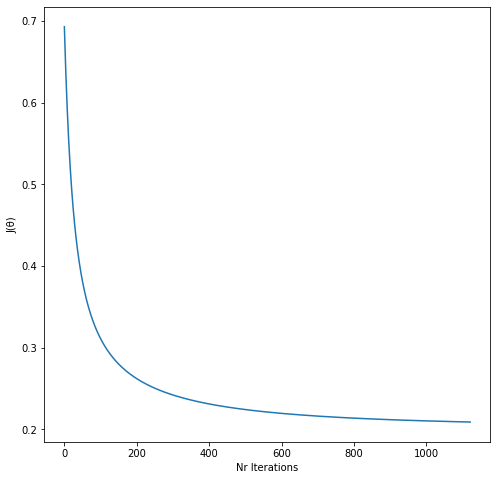

In [9]:
reg.fit(features_train, labels_train)

In [10]:
pred = reg.predict(features_train)
pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [11]:
reg.score(features_train, labels_train)

0.89

In [12]:
x1 = np.linspace(x[:,0].min(), x[:,0].max(), 2)
x2 = -(reg.coefficients[0] + reg.coefficients[1] * x1) / reg.coefficients[2]

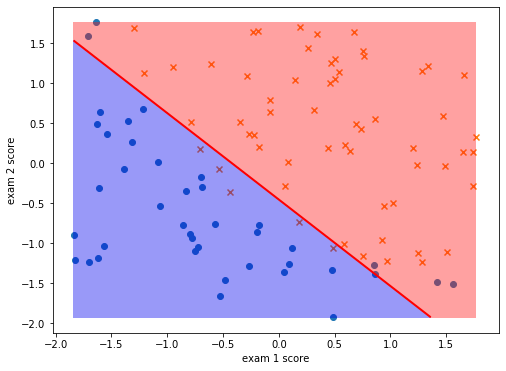

In [13]:
plot_decision_boundary(reg.coefficients, x, y, feature_names=['exam 1 score', 'exam 2 score'])

In [14]:
reg.coefficients

array([[1.31375355],
       [3.13738585],
       [2.89843971]])

In [15]:
reg.final_cost

array([[0.20913195]])

### Problem #2

In [16]:
df = pd.read_csv('ex2data2.txt', header=None)
df.columns = ['QA_1', 'QA_2', 'Pass']

In [17]:
df.head()

,QA_1,QA_2,Pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [18]:
reg = LogisticRegression(max_iter=10000, learning_rate=0.01, reg_param=1)

In [19]:
df[["QA_1", "QA_2"]] = normalize_features(df[["QA_1", "QA_2"]])
df.head()

,QA_1,QA_2,Pass
0,-0.007101,0.997918,1
1,-0.298296,0.969669,1
2,-0.542901,0.983793,1
3,-0.869039,0.616553,1
4,-1.148589,0.545930,1


In [20]:
x = df[["QA_1", "QA_2"]].to_numpy()
y = df[['Pass']].to_numpy()

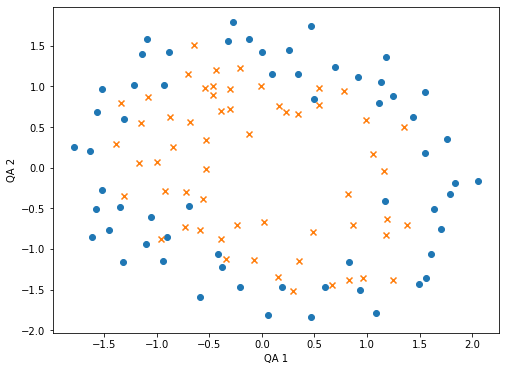

In [21]:
plot_data(x, y, feature_names=['QA 1', 'QA 2'])

In [22]:
# features_train, features_test, labels_train, labels_test = train_test_split(x, y, test_size=0.1, random_state=42)

x = feature_mapping(x, 6)

features_train = x
labels_train = y


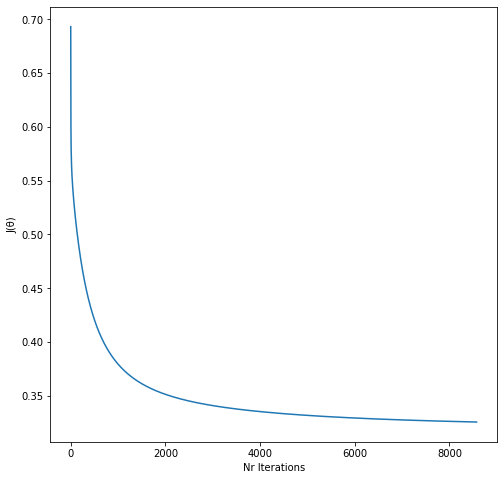

In [23]:
reg.fit(features_train, labels_train)

In [24]:
reg.score(features_train, labels_train)

0.8559322033898306

In [25]:
x.shape

(118, 27)

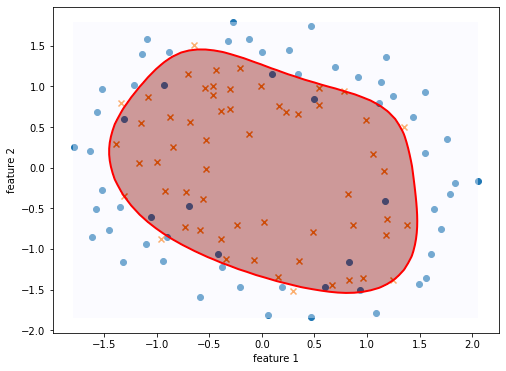

In [26]:
plot_decision_boundary(reg.coefficients, x, y)